# Bank Marketing Data (A Data-Driven Approach to Predict the Success of Bank Telemarketing.)

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:<br /> 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]<br /> 
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br /> 
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).<br /> 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br /> 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).<br /> 

Attribute Information:<br /> 

Input variables:
## Bank client data:
1 - age (numeric)<br /> 
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br /> 
3 - marital : marital status (categorical: 'divorced','married','single')<br /> 
4 - education (categorical: 'unknown','primary','secondary','tertiary')<br /> 
5 - default: has credit in default? (categorical: 'no','yes')<br /> 
6 - housing: has housing loan? (categorical: 'no','yes')<br /> 
7 - loan: has personal loan? (categorical: 'no','yes')<br /> 
8 - balance: account balance (numeric)
## Related with the last contact of the current campaign:<br /> 
9 - contact: contact communication type (categorical: 'cellular','telephone','unknown')<br /> 
10 - day: last contact day  of the month(numeric: 1,2,...,31)<br /> 
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br /> 
12 - duration: last contact duration, in seconds (numeric). <br /> 
## Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br /> 
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br /> 
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br /> 
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')<br /> 

## Output variable (desired target):<br /> 
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive 
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('gdrive/My Drive/Data144FinalProject/bank.csv')

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
for column in df.select_dtypes(exclude=['int64']):
    print(column, df[column].unique())

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'other' 'failure' 'success']
deposit ['yes' 'no']


# Data Exploration
### 1. Explore All Categorical Features

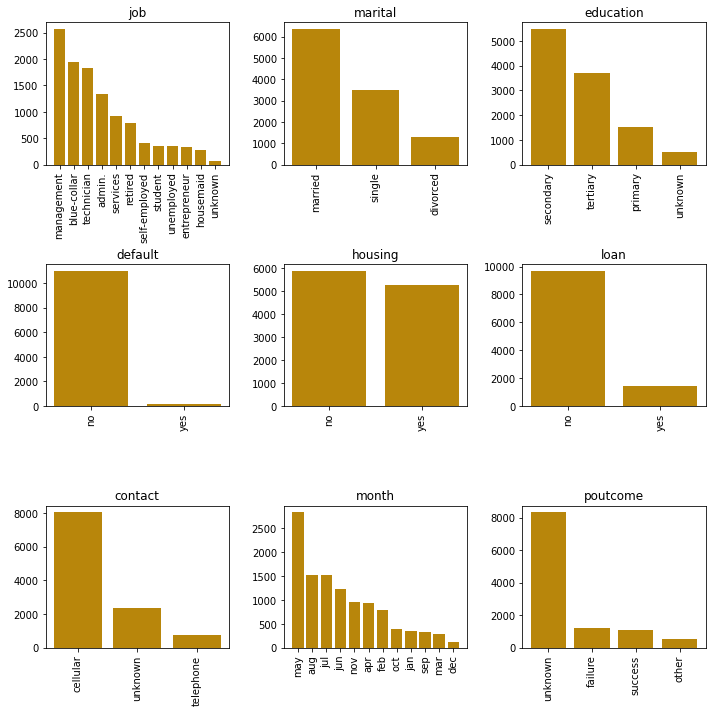

In [ ]:
# 9 categoraical features
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (10, 10))

count = 0
for c in categorical_col:
    value_counts = df[c].value_counts()
    subplot_x = count // 3
    subplot_y = count % 3
    x_pos = np.arange(0, len(value_counts))  
    axs[subplot_x, subplot_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = 'darkgoldenrod')
    axs[subplot_x, subplot_y].set_title(c)
    
    for tick in axs[subplot_x, subplot_y].get_xticklabels():
        tick.set_rotation(90)
    count += 1

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()

### 2. Explore All Numerical Features

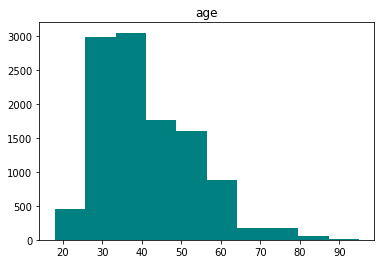

In [ ]:
# age column
plt.hist(df['age'], color = 'teal')
plt.title('age')
plt.show()

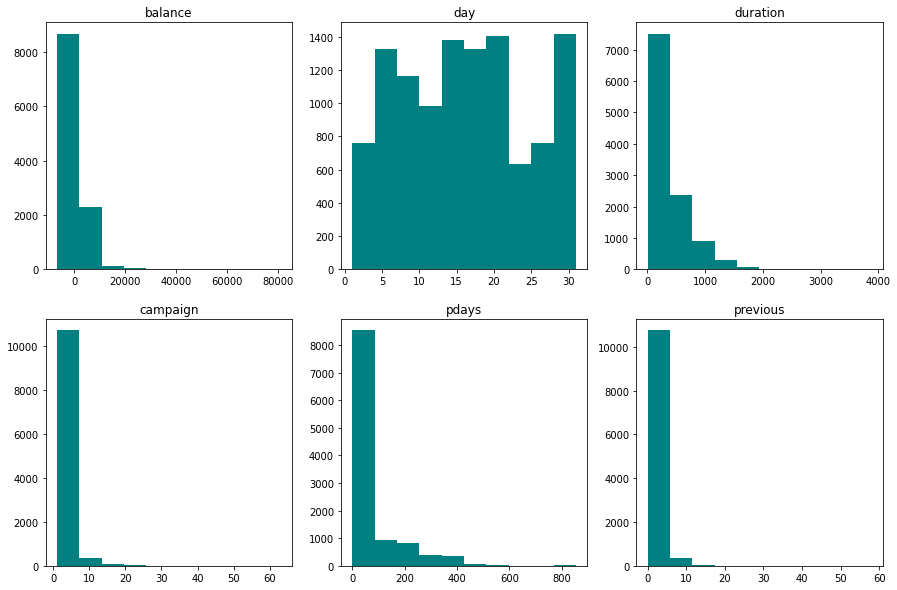

In [ ]:
# 6 numerical features
numerical_col = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

count = 0
for n in numerical_col:
    subplot_x = count // 3
    subplot_y = count % 3
    
    axs[subplot_x, subplot_y].hist(df[n], color = 'teal')
    axs[subplot_x, subplot_y].set_title(n)
    
    count += 1

plt.show()

Most of the numerical columns have outliers and are not normally distributed. So we need to have a closer look at these columns to find out noisy data in the cleaning step.

# Correlation Matrix
Range: [-1, 1]
* No correlaiton r=0
* Very weak correlation: r<20
* Weak correlation: between 0.20-0.49
* Moderate correlation: between 0.5-0.79
* Strong correlation: between 0.8-0.99
* Perfect correlation: r=1

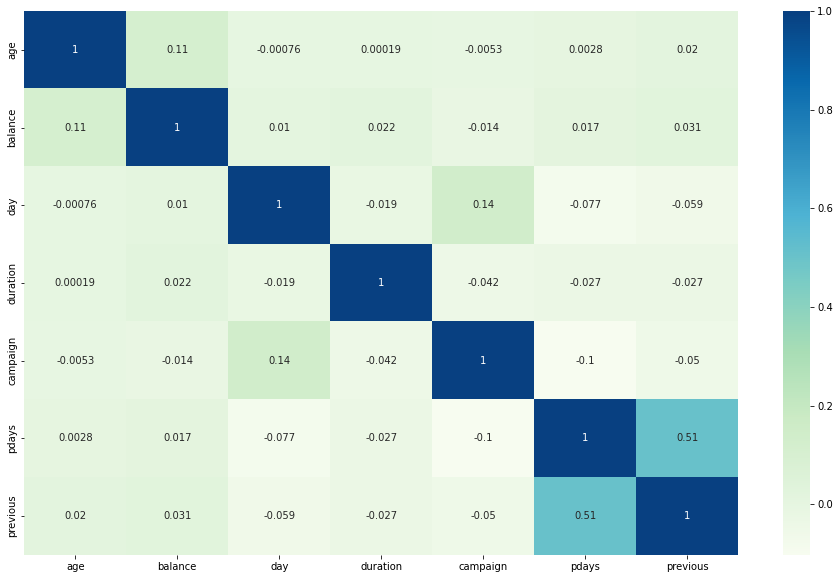

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="GnBu")
plt.show()

There is a moderate correlation (r = 0.51) between the days and the previous days. 

# Data Cleaning

### 1. Convert deposit to 1 and 0

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
def binary(string):
  if string == 'yes':
    return 1
  return 0
df['deposit']=df['deposit'].apply(binary)

###  2. Check potential errors and consistency


In [ ]:
# first, description error: -1 should indicate those that have never been previously contacted  
# second, check consistency with "pdays"
# Move people who was previously contacted but without exact poutcome("failure" or "success") to "others" 
# Move people who have never been contacted to "unknown"

df[(df['poutcome']=='others')&(df['pdays']==-1)] # empty dataset
inconsistent_indices = df[(df['poutcome']=='unknown')&(df['pdays']!=-1)].index
df.iloc[inconsistent_indices]['poutcome']='other'

df[(df['pdays']==-1)&(df['previous']!=0)]#empty dataset
df[(df['pdays']!=-1)&(df['previous']==0)];#empty dataset


### 3. Normalize numerical variables

In [ ]:
# pdays
# distinguish newly contacted customers and customers that have been contacted before
# return 1 if newly contacted, and 0 if previously contacted
def distinguish_new(num):
  if num==-1:
    return 1
  else:
    return 0
df['not_previously_contacted'] = df['pdays'].apply(distinguish_new)


# Categorize day of a month (1:1-10; 2:11-20;3:21-31) 上中下旬
def convert_day(num):
  if num<=10:
    return 1
  elif num>10&num<=20:
    return 2
  else:
    return 3
#df['day'] = df['day'].apply(convert_day)    # not working




### 4. Convert categorical variables


In [ ]:
# education
# mode of education for each job title
dictionary = {}
for job in df['job'].unique():
  accounts_with_job = df[df['job']==job]
  mode_job = accounts_with_job['education'].mode()[0]
  dictionary[job] = mode_job
print(dictionary)

{'admin.': 'secondary', 'technician': 'secondary', 'services': 'secondary', 'management': 'tertiary', 'retired': 'secondary', 'blue-collar': 'secondary', 'unemployed': 'secondary', 'entrepreneur': 'secondary', 'housemaid': 'primary', 'unknown': 'unknown', 'self-employed': 'tertiary', 'student': 'secondary'}


In [ ]:
# Description error: categories are 'secondary', 'tertiary', 'primary', 'unknown'
# Since it is ordinal, we convert them to numbers, and we convert "unknowns" based on mode of job titles
print(df['education'].unique().tolist())
education_list = [ 'primary','secondary', 'unknown', 'tertiary']
for i in range(len(df['education'])):
  if df['education'][i] == 'unknown':
    i_job = df['job'][i]
    df['education'][i] = dictionary[i_job]
  
  df['education'][i] = education_list.index(df['education'][i])


['secondary', 'tertiary', 'primary', 'unknown']


In [ ]:
# month
# categorize month by quarters
def convert_month(string):
  if string in ['jan','feb', 'mar']:
    return 1
  elif string in ['apr','may','jun']:
    return 2
  elif string in ['jul','aug','sep']:
    return 3
  elif string in ['oct','nov','dec']:
    return 4
#df['month']=df['month'].apply(convert_month)    


### Train test split

In [ ]:
y = df["deposit"]
X = df.drop(['deposit'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Further Analysis

In [ ]:
# check outliers
def outlier_range(serie):
  IQR = np.percentile(serie,75)-np.percentile(serie,25)
  min_val = np.percentile(serie,25) - 1.5*IQR
  max_val = np.percentile(serie,75) + 1.5*IQR
  return (min_val, max_val)

def outlier_calculation(serie, _range):
  count = 0
  min_val = _range[0]
  max_val = _range[1]
  largest = serie[0]
  smallest = serie[0]
  for num in serie:
    if num<min_val:
      count += 1
      if num<smallest:
        smallest = num
    elif num>max_val:
      count += 1
      if num>largest:
        largest = num
  IQR = (max_val-min_val)/4
  ratio_of_smallest = (smallest-min_val)/IQR   #how small is the outlier
  ratio_of_largest = (largest-max_val)/IQR #how big is the outlier
  largest_outlier_ratio = max(abs(ratio_of_smallest),ratio_of_largest)
  return (count/len(X_train),largest_outlier_ratio)


In [ ]:
# Further outlier analysis
# proportion of deposited people when they are outliers
def outlier_deposit_proportion(serie, _range):
  deposited = 0
  total_outliers = 0
  for i in range(len(serie)):
    if serie[i]<_range[0] or serie[i]>_range[1]:
      total_outliers += 1
      if y_train[i]==1:
        deposited+=1
  return deposited/total_outliers


In [ ]:
# Remove outliers by setting cutoffs
def remove_outliers(_range, serie):
  _serie = serie.copy()
  IQR = (_range[1]-_range[0])/4
  highest_cutoff = _range[1]+IQR
  lowest_cutoff = _range[0]-IQR

  for i in range(len(serie)):
    if _serie[i]<lowest_cutoff:
      _serie[i] = lowest_cutoff
    elif _serie[i]>highest_cutoff:
      _serie[i] = highest_cutoff

  return _serie

 

In [ ]:
# age
range_age = outlier_range(X_train['age'])
outlier_percentage = outlier_calculation(X_train['age'],range_age)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['age'],range_age)[1]
print("The percentage of outliers in 'age' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

#small % outlier, and makes sense in real life.

The percentage of outliers in 'age' column is 1.4719057980289263%.
The largest outlier is 3.9705882352941178 IQR above/below the outlier range.


In [ ]:
# balance
range_balance = outlier_range(X_train['balance'])
outlier_percentage = outlier_calculation(X_train['balance'],range_balance)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['balance'],range_balance)[1]
print("The percentage of outliers in 'balance' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
print("")
# further analysis
print("Percentage of outliers that are deposited: {}%".format(outlier_deposit_proportion(X_train['balance'],range_balance)*100))
# We see that it's almost half-half for the outliers to have 0/1 value for the target.
# remove outliers of balance
X_train['balance'] = remove_outliers(range_balance, X_train['balance'])
range_balance_test = outlier_range(X_test['balance'])
X_test['balance'] = remove_outliers(range_balance_test, X_test['balance'])

The percentage of outliers in 'balance' column is 9.509791373352105%.
The largest outlier is 49.176226896112176 IQR above/below the outlier range.

Percentage of outliers that are deposited: 56.93135935397039%


In [ ]:
# duration
range_duration = outlier_range(X_train['duration'])
outlier_percentage = outlier_calculation(X_train['duration'],range_duration)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['duration'],range_duration)[1]
print("The percentage of outliers in 'duration' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

# small % outlier. Moreover, note that longer duration implies higher interest, and also for such a high 
# duration, it implies that the customer is making the deposit right away. Otherwise, he/she will not bother to spend time asking 
# things that he/she is not interested in.
# remove outliers of duration
X_train['duration'] = remove_outliers(range_duration, X_train['duration'])
range_duration_test = outlier_range(X_test['duration'])
X_test['duration'] = remove_outliers(range_duration_test, X_test['duration'])

The percentage of outliers in 'duration' column is 6.028414181492384%.
The largest outlier is 8.21919770773639 IQR above/below the outlier range.


In [ ]:
# campaign
range_campaign = outlier_range(X_train['campaign'])
outlier_percentage = outlier_calculation(X_train['campaign'],range_campaign)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['campaign'],range_campaign)[1]
print("The percentage of outliers in 'campaign' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
# small % outlier.
# remove outliers of campaign
X_train['campaign'] = remove_outliers(range_campaign, X_train['campaign'])
range_campaign_test = outlier_range(X_test['campaign'])
X_test['campaign'] = remove_outliers(range_campaign_test, X_test['campaign'])

The percentage of outliers in 'campaign' column is 5.5292461282477925%.
The largest outlier is 28.5 IQR above/below the outlier range.


In [ ]:
# pdays
range_pdays = outlier_range(X_train['pdays']) #(-33.625, 53.375)
outlier_percentage = outlier_calculation(X_train['pdays'],range_pdays)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['pdays'],range_pdays)[1]
print("The percentage of outliers in 'pdays' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
print("")

# percentage of newly contacted customers 
print("Percentage of newly contacted customers: {}%".format(len(X_train[X_train['pdays']==-1])/len(X_train)*100))

# We see that there are a huge amount of newly contacted customers. Therefore, we restrict to only previously contacted customers
# previously contacted customers
previously_contacted = X_train[X_train['pdays']!=-1].reset_index(drop=True)
range_pdays_pc = outlier_range(previously_contacted['pdays'])
outlier_percentage_pc = outlier_calculation(previously_contacted['pdays'],range_pdays_pc)[0]*100
print("% outliers in 'pdays' column for previously contacted customers is {}%.".format(outlier_percentage_pc))
largest_outlier_ratio_pc = outlier_calculation(previously_contacted['pdays'],range_pdays_pc)[1]
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio_pc))

# remove outliers of pdays for previously contacted customers
previous_list = remove_outliers(range_pdays_pc, previously_contacted['pdays']).tolist()
previously_contacted = X_train[X_train['pdays']!=-1]
previously_contacted['pdays'] = previous_list
previously_contacted['pdays'].index
X_train['pdays'].iloc[previously_contacted['pdays'].index] = previously_contacted['pdays']

# test set
previously_contacted = X_test[X_test['pdays']!=-1].reset_index(drop=True)
range_pdays_pc = outlier_range(previously_contacted['pdays'])
previous_list = remove_outliers(range_pdays_pc, previously_contacted['pdays']).tolist()
previously_contacted = X_test[X_test['pdays']!=-1]
previously_contacted['pdays'] = previous_list
previously_contacted['pdays'].index
X_test['pdays'].iloc[previously_contacted['pdays'].index] = previously_contacted['pdays']


The percentage of outliers in 'pdays' column is 17.970049916805326%.
The largest outlier is 16.931818181818183 IQR above/below the outlier range.

Percentage of newly contacted customers: 74.38883911429669%
% outliers in 'pdays' column for previously contacted customers is 0.3071803404582107%.
The largest outlier is 2.0077720207253886 IQR above/below the outlier range.


In [ ]:
def replace(num):
  if num==-1:
    return -10
  else:
    return num
X_train['pdays']= X_train['pdays'].apply(replace)
X_test['pdays'] = X_test['pdays'].apply(replace)

In [ ]:
# previous
range_previous = outlier_range(X_train['previous'])
outlier_percentage = outlier_calculation(X_train['previous'],range_previous)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['previous'],range_previous)[1]
print("The percentage of outliers in 'previous' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

# Similar analysis as in pdays
previously_contacted = X_train[X_train['pdays']!=-1].reset_index(drop=True)
range_previous_pc =  outlier_range(previously_contacted['previous'])
outlier_percentage_pc = outlier_calculation(previously_contacted['previous'],range_previous_pc)[0]*100
print("% outliers in 'previous' column for previously contacted customers is {}%.".format(outlier_percentage_pc))
largest_outlier_ratio_pc = outlier_calculation(previously_contacted['previous'],range_pdays_pc)[1]
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio_pc))
# Therefore, we see that there are really small amount of outliers, which are not too "outlier"(within 1 IQR range). Thus, we disregard it.

The percentage of outliers in 'previous' column is 11.263279150134393%.
The largest outlier is 55.5 IQR above/below the outlier range.
% outliers in 'previous' column for previously contacted customers is 11.263279150134393%.
The largest outlier is 0.9367816091954023 IQR above/below the outlier range.


In [ ]:
# Scaling numerical columns
# X_train
def normalize(serie):
  return (serie-min(serie))/(max(serie)-min(serie))

numerical_columns = X_train[['age','campaign','balance','day','duration','previous','pdays']]
temporary = pd.DataFrame(StandardScaler().fit_transform(numerical_columns))
X_train['age']=temporary[0]
X_train['campaign']=temporary[1]
X_train['balance']=temporary[2]
X_train['day']=temporary[3]
X_train['duration']=temporary[4]
X_train['previous']=temporary[5]
X_train['pdays']=temporary[6]

numerical_columns = X_test[['age','campaign','balance','day','duration','previous','pdays']]
temporary = pd.DataFrame(StandardScaler().fit_transform(numerical_columns))
X_test['age']=temporary[0]
X_test['campaign']=temporary[1]
X_test['balance']=temporary[2]
X_test['day']=temporary[3]
X_test['duration']=temporary[4]
X_test['previous']=temporary[5]
X_test['pdays']=temporary[6]


In [ ]:

#previously_contacted = X_train[X_train['pdays']!=-1]['pdays']
#previously_contacted = normalize(previously_contacted)
#X_train['pdays'].iloc[previously_contacted.index] = previously_contacted

#previously_contacted = X_test[X_test['pdays']!=-1]['pdays']
#previously_contacted = normalize(previously_contacted)
#X_test['pdays'].iloc[previously_contacted.index] = previously_contacted


In [ ]:
# convert all dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

### Final Cleaned Data

In [ ]:
X_train

,age,balance,day,duration,campaign,pdays,previous,not_previously_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_1,education_2,education_3,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,2.765525,-0.755311,-0.324645,0.631535,-0.188574,-0.489456,-0.358947,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.168241,-0.724987,-1.038703,0.415362,0.919609,-0.489456,-0.358947,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1.336376,-0.598118,1.341489,-0.497015,-0.742666,-0.489456,-0.358947,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-0.344975,1.704700,-0.562664,-0.636892,-0.188574,-0.489456,-0.358947,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.252309,2.719648,1.579509,-0.729083,-0.742666,1.330014,0.067780,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,-1.269718,-0.294872,-0.086626,0.780949,-0.742666,-0.489456,-0.358947,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7809,-0.176840,-1.653293,1.698518,-0.948435,1.473701,-0.489456,-0.358947,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7810,-1.185651,0.686039,1.341489,-0.738620,-0.742666,-0.489456,-0.358947,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7811,-0.008705,-0.145724,1.698518,-0.284021,-0.188574,3.052329,4.335054,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
y_train

0       1
1       1
2       1
3       0
4       0
       ..
7808    0
7809    0
7810    1
7811    1
7812    1
Name: deposit, Length: 7813, dtype: int64

In [ ]:
X_test

,age,balance,day,duration,campaign,pdays,previous,not_previously_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_1,education_2,education_3,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.881406,-0.423513,-1.240667,-0.844519,-0.753387,-0.486512,-0.374961,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.122902,-0.447402,0.532546,-1.028290,-0.182034,-0.486512,-0.374961,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.299867,-0.588944,-0.176739,0.441878,-0.182034,-0.486512,-0.374961,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,-0.211867,-0.700027,-1.477095,-0.480040,-0.753387,1.316333,0.086540,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,-0.128175,-0.754374,-1.122452,-0.731193,-0.182034,0.511987,2.394046,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,-0.462944,-0.419333,-0.767810,-0.525982,-0.182034,-0.486512,-0.374961,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3345,0.708748,-0.270625,-0.058525,-0.853707,-0.753387,0.558213,1.009542,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3346,-0.546636,-0.485027,0.177904,-0.458600,2.103375,-0.486512,-0.374961,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3347,0.457671,1.056996,-0.886024,-0.235012,-0.753387,-0.486512,-0.374961,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
y_test

0       0
1       0
2       0
3       1
4       1
       ..
3344    0
3345    1
3346    0
3347    1
3348    0
Name: deposit, Length: 3349, dtype: int64

### Simple test

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Train accuracy: ", model.score(X_train,y_train))
print("Test accuracy: ", model.score(X_test,y_test))

Train accuracy:  0.8293869192371688
Test accuracy:  0.826515377724694


### Model Selection 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# The Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
grid_values = {'ccp_alpha' : np.linspace(0,0.1,200)}
dtc = DecisionTreeClassifier()

#Cross-Validation
cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
dtc_cv = GridSearchCV(dtc,param_grid = grid_values, scoring = 'r2', cv = cv)
dtc_cv.fit(X_train, y_train)

#Predict the response for test dataset
dtc_pred = dtc_cv.predict(X_test)

# model Evaluation
print("Accuracy:", accuracy_score(dtc_pred, y_test))

# Classification Report & Confusion matrix
print(confusion_matrix(y_test, dtc_pred))

In [ ]:
# The KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
# build model
knn_model = KNeighborsClassifier(leaf_size=27, n_neighbors=7, p=2)

# fit classifiers
knn_model.fit(X_train, y_train)
# Prediction
knn_pred = knn_model.predict(X_test)

# model Evaluation
print("Accuracy:",accuracy_score(y_test, knn_pred))
# Classification Report & Confusion matrix
print(confusion_matrix(y_test, knn_pred))

In [ ]:
# Tune KNN Classifier
#List Hyperparameters that we want to tune.
leaf_size = list(range(27,30))
n_neighbors = list(range(4,9))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# the SVM Classifier

from sklearn import svm
# build model
svm_model = svm.SVC()
# fit classifiers
svm_model.fit(X_train, y_train)
# Prediction
svm_pred = svm_model.predict(X_test)
# model Evaluation
print("Accuracy:",accuracy_score(y_test, svm_pred))
# Classification Report & Confusion matrix
print(confusion_matrix(y_test, svm_pred))

In [ ]:
#Trying to reduce the dimensionality for SVM classifier

from sklearn.decomposition import PCA
for i in np.arange(10,40):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    pca2 = PCA(n_components = i)
    pca2.fit(X_test)
    X_test_pca = pca2.transform(X_test)
    X_pca = pca.transform(X_train)
    svm_pca = svm.SVC().fit(X_pca, y_train)
    svm_pred = svm_pca.predict(X_test_pca)
    
    # model Evaluation
    print("Accuracy PCA",i,": ",accuracy_score(y_test, svm_pred))

In [ ]:
#SVM with GridSearch Hyperparameters

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
import catboost
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm,cv, CatBoostClassifier
from catboost.utils import get_roc_curve, select_threshold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Create Catboost 
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)}

model_cbc = CatBoostClassifier(verbose=0, random_state = 0)

rscv = RandomizedSearchCV(model_cbc , param_dist, scoring='accuracy', cv =5) 

X_train_cat = X_train.iloc[:,selected_features]
X_test_cat = X_test.iloc[:, selected_features]
                                                       
rscv.fit(X_train_cat, y_train )
y_pred = rscv.predict(X_test_cat)
print(classification_report(y_test,y_pred))
# model Evaluation
print("Accuracy:",accuracy_score(y_test, y_pred))
# Classification Report & Confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(rscv.best_params_)
print(rscv.best_score_)

In [ ]:
# Experimentation with tuning in CBC 
cbc_params = {'loss_function':'Logloss', 
          'eval_metric':'AUC', 
          'verbose': 200, 
          'random_seed': 1,
         }
# Declaring classifier model
cbc = CatBoostClassifier()

# Fitting classifer to training set
cbc.fit(X_train, y_train,               
          eval_set=(X_test, y_test), 
          use_best_model=True, 
          plot=True 
);

# Predicting test set
cbc_predict = cbc.predict(X_test)

# Evaluating predictions
cbc_accuracy = accuracy_score(y_test, cbc_predict)
cbc_cm = confusion_matrix(y_test, cbc_predict)

# Printing classification report 
print('CatBoostClassifier Report:\n')
print(classification_report(y_test, cbc_predict))
print('Accuracy of CatBoostClassifier is: {}'.format(cbc_accuracy))

In [ ]:
# 29 features resulted in the lowest rmse 
feature_names = ['F{}'.format(i) for i in range(X_train.shape[1])]
train_pool = Pool(X_train, y_train, feature_names=feature_names)
test_pool = Pool(X_test, y_test, feature_names=feature_names)
for i in np.arange(29, 31):
    model_cat = CatBoostRegressor(iterations=1000, random_seed=0)
    summary = model_cat.select_features(
        train_pool,eval_set=test_pool,
        features_for_select='0-42', num_features_to_select=i,steps=2,
        algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,logging_level='Silent',plot=True
)

In [ ]:
X_train_cat = X_train.iloc[:,selected_features]
X_test_cat = X_test.iloc[:, selected_features]

#fit the model
model_cat.fit(X_train_cat,y_train)
y_pred_cat = model_cat.predict(X_test_cat)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Catboost (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)') 
plt.legend(loc='lower right', fontsize=14) 
plt.show()

In [ ]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Computing feature importance
feature_importances = pd.DataFrame(model_cat.feature_importances_,
                                   index = X_train_cat.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

# Plotting feature importance
plt.figure(figsize=(20,8))
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.title('Importance of Features in Dataframe', fontsize = 16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize = 14)
plt.grid()
plt.show()

In [ ]:
# Final CatBoostingRegressor Accuracy
y_pred_cat_final = [1 if i >= thresholds[ix] else 0 for i in y_pred_cat]
# model Evaluation
print("Accuracy:",accuracy_score(y_test, y_pred_cat_final))
# Classification Report & Confusion matrix
print(confusion_matrix(y_test, y_pred_cat_final))

In [ ]:
# The Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
# build model
log_model = LogisticRegression()
# fit classifiers
log_model.fit(X_train, y_train)
# Prediction
log_pred = log_model.predict(X_test)

# model Evaluation
print("Accuracy :", accuracy_score(y_test, log_pred))
# confusion matrix
print(confusion_matrix(y_test, log_pred))

In [ ]:
# The Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
grid_values = {'ccp_alpha' : [0,0.0001]}

rf_model = RandomForestClassifier(n_estimators=100)
cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
rf_cv = GridSearchCV(rf_model,param_grid = grid_values, scoring = 'accuracy', cv = cv, verbose = 0)
# Fitting the classifier
rf_cv.fit(X_train, y_train)
rf_pred = rf_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_pred))
#  Confusion matrix
print(confusion_matrix(y_test, rf_pred))
print(rf_cv.best_params_)

In [ ]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

In [ ]:
from sklearn.ensemble import VotingClassifier 
clf_vc = VotingClassifier(estimators=[('catboost', model_cbc),                                       
                                      ('Random Forest', rf_cv),
                                      ('SVM', svm_model),
                                     ],
                          voting='hard',
                          weights=[0.6, 0.1, 0.3])

clf_vc = clf_vc.fit(X_train, y_train)
print('Final Model Accuracy: %.5f'%(accuracy_score(y_test, clf_vc.predict(X_test))))